In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
%matplotlib inline

In [4]:
Accidents = pd.read_csv(r"C:\Users\Administrator\Desktop\Machine Learning\Accidents\Accidents.csv")
Accidents.head()

,Speed (mph),Drunk Driving (%),Weather,Accident Severity
0,55,5,Clear,3
1,45,2,Rainy,6
2,60,8,Clear,8
3,40,1,Foggy,2
4,65,4,Rainy,9


In [126]:
Y = Accidents.iloc[:,:-1].values
X = Accidents.iloc[:3].values

In [121]:
sn.heatmap(Accidents.corr())

In [5]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

X= Accidents.iloc[:,:-1].values

labelEncoder = LabelEncoder()

Y = Accidents.iloc[:,-1].values

X[:,2] = labelEncoder.fit_transform(X[:,2])

ct = ColumnTransformer([('Weather', OneHotEncoder(),[2])], remainder='passthrough')

X = ct.fit_transform(X)

X = X[:,1:]

X=X[:,-2]

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.2,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

y_pred = regressor.predict(X_train)

y_pred.shape

(71, 1)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_train)

In [13]:
from sklearn.metrics import r2_score
r2_score(Y_train,y_pred)

0.6592201745335369

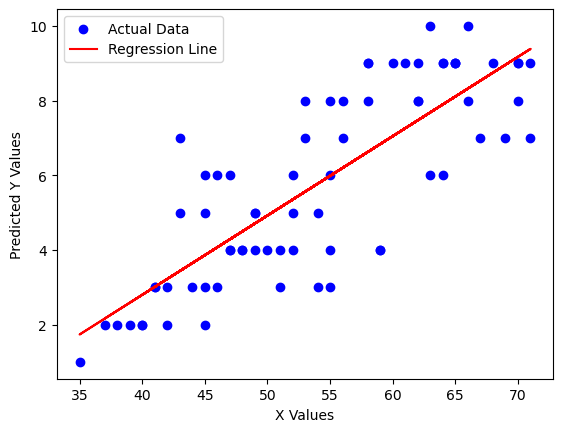

In [12]:
import matplotlib.pyplot as plt


plt.scatter(X_train, Y_train, c='blue', label="Actual Data")

plt.plot(X_train, y_pred, color='red', label="Regression Line")


plt.xlabel("X Values")
plt.ylabel("Predicted Y Values")
plt.legend()

plt.show()